# Chapter 8: Introduction to machine learning
___

## Linear algebra: Terminology

- $\mathbf{X} \in \mathbb{R}^{n \times m}$ is used to denote a $n$-by-$m$ matrix.
- $\mathbf{x} \in \mathbb{R}^n$ is used to denote a $n$-dimensional vector.
- $\mathbf{x}^{(i)}$ is used to denote the $i$-th row of the matrix $\mathbf{X}$.
- $x_j$ is used to denote the $j$-th element of the vector $\mathbf{x}$.

## VC-dimension

- Two points of two classes on a line can be surely separated by a point.
- Three points of two classes on a line are not guaranteed to be separated.
- On the 2-D space, 3 points of two classes can be surely separated by a line.
- On the 2-D space, 4 points of two classes are not guaranteed to be separated.
- ....

## Supervised learning

- With the input data $\mathbf{y}$ and  $\mathbf{X}$,  train and evaluate $f: \mathbf{X} \mapsto \mathbf{y}$
    * Regression:  $\mathbf{y}$ is continuous variable.
    * Classification: $\mathbf{y}$ is categorical variable.

## Linear regression

- $\mathbf{y} = \mathbf{X w}$, where $\mathbf{y} \in \mathbb{R}^n$, $\mathbf{X} \in \mathbb{R}^{n \times m}$
- Loss function (squared loss): $L = \frac{1}{2} (\mathbf{y - Xw})^T (\mathbf{y - Xw})$
- Normal equation:
    * $\mathbf{w} = (\mathbf{X^T X})^{-1} \mathbf{X}^T \mathbf{y}$
    * When $\mathbf{X}$ is not singular; that is, $\mathbf{X}^T \mathbf{X}$ is invertible

- Regularization:
    * Loss function: $L = \frac{1}{2}(\mathbf{y - Xw})^T (\mathbf{y - Xw}) + \lambda_1 \lVert \mathbf{w} \rVert_2^2 + \lambda_2 \lVert \mathbf{w} \rVert_1$
    * $\ell_2$-regularization: ridge regression, $\lambda_2 = 0$
    * $\ell_1$-regularization: LASSO (least absolute shrinkage and selection operator), $\lambda_1 = 0$
    * $\ell_1$ + $\ell_2$-regularization: Elastc net

## Linear classifiers
When the data is linearly separable:
- Perceptron to Multiple-Layer Perceptron (MLP)
- Logistic regression to Softmax classifier
- Linear Support Vector Machines (SVM)

## Perceptron

![](images/perceptron1.png)
We can use a perceptron rule to classify the instances:
$$
\begin{eqnarray}
z &=& \mathbf{w}^T \mathbf{x}\\
y &=& g(z) = \left\{ \begin{array}{ll}
1 & \text{if } z \ge 0\\
-1 & \text{otherwise}
\end{array} \right.
\end{eqnarray}
$$

This is the illustration of the perceptron:
![](images/perceptron2.png)

When $\mathbf{y}$ is binary (dichotomous):

1. Initiate $\mathbf{w} \in \mathbb{R}^m$
2. Compute $\hat{\mathbf{y}} = \mathbf{Xw}$
3. REPEAT
    * $\Delta \mathbf{w} = \eta (\hat{y}^{(i)} - y^{i}) \mathbf{x}^{(i)}$
    * $\mathbf{w} := \mathbf{w} - \Delta \mathbf{w}$
    * Update $\mathbf{y}$
4. UNTIL no update can be done to $\mathbf{w}$
5. Output $\mathbf{w}$

## Logistic regression

![](images/logistic1.png)
Logistic regression can be used to predict the conditional probability $p(y=1 \big| \mathbf{x})$:
- Odds ratio (OR): $\frac{p(y=1)}{p(y=0)} = \frac{p(y=1)}{1-p(y=1)}$
- Logit function: $\log \frac{p(y=1)}{1-p(y=1)}$
- Sigmoid function: $g(z) = \frac{1}{1+\exp(-z)}$
- Logistic regression:
    * $logit(\mathbf{y}) = \mathbf{Xw}$
    * $p(y=1) = \frac{1}{1+\exp(-\mathbf{w}^T \mathbf{x})}$

## Logistic regression: Optimization

- $p(y^{(i)} \big| \mathbf{x}^{(i)}, \mathbf{w}) = p(y^{(i)}=1)^{y^{(i)}} p(y^{(i)}=0)^{1-y^{(i)}}$
- Likelihood function: $L = \prod_{i=1}^n p(y^{(i)} \big| \mathbf{x}^{(i)}, \mathbf{w})$
- Log-likelihood function: $\ell(\mathbf{w}) = \log L = \sum_{i=1}^n y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)} - \log(1 + \exp(\mathbf{w}^T \mathbf{x}^{(i)}))$
- $\mathbf{w}^{*} = \operatorname{argmax}_{\mathbf{w}} \ell(\mathbf{w})$
    * $\ell(\mathbf{w})$ is a concave function
    * Gradient ascent can be used for finding the optimal value.

## Gradient ascent for logistic regression

- Gradient: $\nabla_{\mathbf{w}} \ell(\mathbf{w}) = \left[  \frac{\partial \ell}{\partial w_0}, \dots,  \frac{\partial \ell}{\partial w_n}\right]$
- Update rule: $\Delta \mathbf{w} =  \eta \nabla_{\mathbf{w}} \ell(\mathbf{w})$
    * $\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \eta \frac{\partial \ell(\mathbf{w})}{\partial \mathbf{w}} $
- Conjugate gradient ascent approach can be much better.
- Or we can try stochastic gradient ascent, rather than batch gradient ascent.

## Support vector machines (SVM)
- Margin maximization: 
$$
\begin{array}{ll}
\max_{\mathbf{w, b}} & \frac{2}{\lVert  \mathbf{w} \rVert} \\
\textit{s.t.} & y_i (\mathbf{w}^T \mathbf{x}_i + b) \ge 1
\end{array}
$$
- Converted to minimization problem:
$$
\begin{array}{ll}
\min_{\mathbf{w}, b} & \frac{1}{2} \lVert  \mathbf{w} \rVert^2 \\
\textit{s.t.} & y_i (\mathbf{w}^T \mathbf{x}_i + b) \ge 1
\end{array}
$$

## Lagrangian optimization

- Optimization problem of the form:
$$
\begin{array}{ll}
\min_{\mathbf{x}} &  f(\mathbf{x}) \\
\textit{s.t.} & g(\mathbf{x}) \le 0 \\
& h(\mathbf{x}) = 0
\end{array}
$$
- Lagrangian function: $L(\mathbf{x}, \lambda, \gamma) = f(\mathbf{x}) + \lambda g(\mathbf{x}) + \gamma h(\mathbf{x}), \lambda \ge 0$
- The original problem now can be converted into:
$$
\begin{array}{ll}
\min_{\mathbf{x}} L(\mathbf{x}, \lambda, \gamma)
\end{array}
$$

## Max-margin problem: Lagrangian method of multiplier (拉格朗日乘子法)
- Original form:
$$
\begin{array}{ll}
\min_{\mathbf{w}, b} & \frac{1}{2} \lVert  \mathbf{w} \rVert^2 \\
\textit{s.t.} & y_i (\mathbf{w}^T \mathbf{x}_i + b) \ge 1
\end{array}
$$
- Lagrangian form:
$$
L(\mathbf{w}, b, \mathbf{\alpha}) = \frac{1}{2} \lVert \mathbf{w} \rVert^2 - \sum_{i=1}^n  \alpha_i  (y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1), \alpha_i \ge 0
$$
- Primal problem (原问题):
$$
\min_{\mathbf{w}, b}\,\max_{\mathbf{\alpha}}\; L(\mathbf{w}, b, \mathbf{\alpha})
$$
- Dual problem (对偶问题):
$$
\max_{\mathbf{\alpha}} \,\min_{\mathbf{w}, b}\; L(\mathbf{w}, b, \mathbf{\alpha})
$$

## Dual function of the Lagrangian function
$$
\begin{array}{lcl}
L(\mathbf{w}, b, \mathbf{\alpha}) &=& \frac{1}{2} \lVert \mathbf{w} \rVert^2 - \sum_{i=1}^n \alpha_i (y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1) \\
&=& \frac{1}{2} \mathbf{w}^T \mathbf{w} - \mathbf{w}^T \sum_{i=1}^n \alpha_i  y_i  \mathbf{x}_i - b \sum_{i=1}^n \alpha_i y_i + \sum_{i=1}^n \alpha_i
\end{array}
$$
- Compute the partial derivatives with regard to $\mathbf{w}$ and $b$:
$$
\begin{array}{lcl}
\frac{\partial L}{\partial \mathbf{w}} &=& \mathbf{w} - \sum_{i=1}^n \alpha_i y_i  \mathbf{x}_i = 0\\
\frac{\partial L}{\partial b} &=& \sum_{i=1}^n \alpha_i y_i  = 0
\end{array}
$$
- Then we can get:
$$
\begin{array}{lcl}
L(\mathbf{\alpha}) &=& \sum_{i=1}^n \alpha_i - \frac{1}{2} (\sum_{i=1}^n \alpha_i y_i \mathbf{x}_i)^T \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i \\
&=& \sum_{i=1}^n \alpha_i  - \frac{1}{2}\sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j
\end{array}
$$
- Therefore the problem is converted to maximization of $L(\mathbf{\alpha})$:
$$
\begin{array}{ll}
\max_{\mathbf{\alpha}} &  \sum_{i=1}^n \alpha_i  - \frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j \\
\textit{s.t.} & \sum_{i=1}^n \alpha_i y_i = 0 \\
& \alpha_i \ge 0, i=1, \dots, n
\end{array}
$$

## Sequential minimal optimization (SMO)

If we have multiple Lagrangian multipliers:
- Choose two of the multipliers for optimization (say $\alpha_1, \alpha_2$), while fix the other multiliers

- Iteration equation:
$$
g(\mathbf{x}) = \sum_{i=1}^n y_i \alpha_i \kappa(\mathbf{x}_i, \mathbf{x}) + b
$$
- Compute $\eta$:
$$
\eta = \kappa(\mathbf{x}_1, \mathbf{x}_1) + \kappa(\mathbf{x}_2, \mathbf{x}_2) - 2 \kappa(\mathbf{x}_1, \mathbf{x}_2)
$$
- Compute $E_i$:
$$
E_i = g(\mathbf{x}_i) - y_i = \left( \sum_{j=1}^n y_j \alpha_j \kappa(\mathbf{x}_j, \mathbf{x}_i) + b \right) - y_i, i=1, 2
$$
- Update $\alpha_j$:
$$
\alpha_j^{\text{new}} = \alpha_j^{\text{old}} + \frac{y_j (E_i - E_j)}{\eta}
$$

## Linearly-separable SVM
After getting $\mathbf{\alpha}^{*}$, we can compute
$$
\begin{array}{lcl}
\mathbf{w}^{*} &=& \sum_{i=1}^n \alpha_i^{*} y_i \mathbf{x}_i \\
b^{*}  &=&  y_j - \sum_{i=1}^n \alpha_i^{*} y_i \mathbf{x}_i ^T \mathbf{x}_j 
\end{array}
$$

Then we can get the separating hyperplane:
$$
\mathbf{w^{*}}^T \mathbf{x} + b^{*} = 0
$$

And the decision function is:
$$
f(\mathbf{x}) = \operatorname{sign} \left( \mathbf{w^{*}}^T \mathbf{x} + b^{*} \right)
$$

## Soft-margin classifier: the introduction of slack variable

When the data is not linearly-separable (i.e., there exist outliers), we can introduce the slack variables $\xi_i \ge 0$, such that the constaint turn into:
$$
y_i [\mathbf{w}^T \mathbf{x}_i + b] \ge 1 - \xi_i
$$

And the objective function becomes:
$$
\begin{array}{ll}
\min_{\mathbf{w}, b} & \frac{1}{2} \lVert \mathbf{w} \rVert^2 + C \sum_{i=1}^n \xi_i\\
\textit{s.t.} & y_i [\mathbf{w}^T \mathbf{x}_i + b] \ge 1 - \xi_i \\
& \xi_i \ge 0
\end{array}
$$

## Lagrangian function with slack variable

- The Lagrangian function:
$$
L(\mathbf{w}, b, \mathbf{\xi}, \mathbf{\alpha}, \mathbf{\mu}) = \frac{1}{2} \lVert \mathbf{w} \rVert^2 + C\sum_{i=1}^n \xi_i - \sum_{i=1}^n \alpha_i (y_i(\mathbf{w}^T \mathbf{x}_i + b - 1 + \xi_i)) - \sum_{i=1}^n \mu_i \xi_i 
$$

- Compute the partial derivatives with regard to $\mathbf{w}$, $b$ and $\mathbf{\xi}$:
$$
\begin{array}{lcl}
\frac{\partial L}{\partial \mathbf{w}}  = 0 &\Rightarrow & \mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i\\
\frac{\partial L}{\partial b} = 0 & \Rightarrow & \sum_{i=1}^n \alpha_i y_i = 0\\
\frac{\partial L}{\partial \mathbf{\xi}} = 0 & \Rightarrow & C - \alpha_i - \mu_i = 0
\end{array}
$$

## Lagrangian method of multiplier

- Primal problem
$$
\begin{array}{ll}
\max_{\mathbf{\alpha}} & -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j + \sum_{i=1}^n \alpha_i \\
\textit{s.t.} & \sum_{i=1}^n \alpha_i y_i = 0 \\
& C - \alpha_i - \mu_i = 0\\
& \alpha_i \ge 0, \mu_i \ge 0, i=1, \dots, n
\end{array}
$$
- Dual problem:
$$
\begin{array}{ll}
\min_{\mathbf{\alpha}} & \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j - \sum_{i=1}^n \alpha_i \\
\textit{s.t.} & \sum_{i=1}^n \alpha_i y_i = 0 \\
& C - \alpha_i - \mu_i = 0\\
& 0 \le \alpha_i \le C, i=1, \dots, n
\end{array}
$$

- Solution:
$$
\begin{array}{lcl}
\mathbf{w}^{*} &=& \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i  \\
b^{*} &=& \frac{\operatorname{max}_{i: y=-1} \mathbf{w^*}^T \mathbf{x}_i + \operatorname{min}_{i: y=+1} \mathbf{w^*}^T \mathbf{x}_i }{2}
\end{array}
$$

## Nonlinear SVM: Kernel SVM

When the data is not linearly separable in the original feature space, we can map them to a higher-dimensional space using the basis function $\phi(\cdot)$, to make them separable in the kernel space. We can replace $\mathbf{x}_i, \mathbf{x}_j$ in the previous equations with $\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)$.

- Linear kernel function: $\kappa(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j = \mathbf{x}_i \cdot \mathbf{x}_j$
- Multinomial kernel function: $\kappa(\mathbf{x}_i, \mathbf{x}_j) = \left( \alpha \lVert \mathbf{x}_i - \mathbf{x}_j \rVert^a + \gamma \right)^b$
- Gaussian kernel function (RBF): $\kappa(\mathbf{x}_i, \mathbf{x}_j) = \exp \left( -\frac{\lVert \mathbf{x}_i - \mathbf{x}_j \rVert^2}{2\sigma^2} \right)$
- Sigmoid kernel function: $\kappa(\mathbf{x}_i, \mathbf{x}_j) = \operatorname{tanh}(\gamma \lVert \mathbf{x}_i - \mathbf{x}_j \rVert^a + \gamma)$

We can compute the kernel matrix $\mathbf{K}$ thus $k_{ij} = \kappa(\mathbf{x}_i, \mathbf{x}_j)$:
- $\mathbf{K}$ is symmetric and positive semi-definite.

## Loss function

- Logistic loss function
- 0/1 loss function
- Hinge loss function

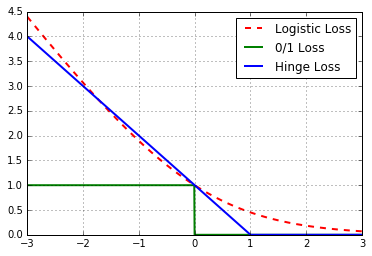

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array(np.linspace(start=-3, stop=3, num=1001, dtype=np.float))
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.plot(x, y_logit, 'r--', label='Logistic Loss', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
plt.grid()
plt.legend(loc=0);

## Decision tree

- Shannon's Information Entropy (熵)
$$
H(D) = - \sum_{k=1}^K  \frac{\lvert  C_k\rvert}{\lvert D \rvert} \log_2 \frac{\lvert  C_k\rvert}{\lvert D \rvert}
$$

- Empirical Conditional entropy (经验条件熵)
$$
H(D \big| A) = - \sum_{i=1}^n \frac{\lvert D_i \rvert}{\lvert D \rvert}  \sum_{k=1}^K \frac{\lvert D_{ik}\rvert}{\lvert D_i \rvert}\log_2 \frac{\lvert D_{ik}\rvert}{\lvert D_i \rvert}
$$

- Information gain (信息增益)
$$
g(D, A) = H(D) - H(D \big| A)
$$

- Information gain rate (信息增益率)
$$
g_r(D, A) = g(D, A) / H(A)
$$

- Gini coefficient (基尼系数)
$$
Gini(\mathbf{p}) = \sum_{k=1}^K p_k (1- p_k) = 1- \sum_{k=1}^K p_k^2 = 1 - \sum_{k=1}^K \left( \frac{\lvert C_k\rvert}{\lvert D \rvert}\right)^2
$$

## The Basic Algorithm

1. Start at the root node as parent node
2. Split the parent node at the feature $x_i$ to maximize information gain (IG)
3. Assign training samples to new child nodes
4. Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

### Stopping Rules

1. The leaf nodes are pure
2. A maximal node depth is reached
3. A minimum node size is reached
4. Splitting a note does not lead to an information gain*

## Decision tree: An example

![](images/decisiontree1.png)

### <font color="red">Exercise</font>

Compute the information gain at each split in the above decision tree.

## Ensemble Learning: Majority vote

Ensemble learning works by combining multiple *weak* classifiers into a *strong classifier*  through majority vote or weighted majority vote.

- **Bagging**: Bootstrapped Aggregating by resampling the training samples with replacement
![](images/bagging.png)
- **Boosting**: Boosting the performance of weaker learner through gradient, and etc.
![](images/boosting.png)
- Known ensemble learners:
    * random forest (随机森林)
    * adaptive boosting (AdaBoost)
    * GBDT

## Assessment of the classfiers


- For a binary classifier, both the prediction error (ERR) and accuracy (ACC) provide general information about how many samples are misclassified.

- The **error** can be understood as the sum of all false predictions divided by the number of total predictions:
$$
ERR = \frac{FP + FN}{FP + FN + TP + TN}
$$

(TP = true positives, FP = false positives, TN = true negatives, FN = false negatives)

- The prediction **accuracy** can then be calculated directly from the error:
$$
ACC = \frac{TP + TN}{FP + FN + TP + TN} = 1 - ERR
$$

- The true **\textit{positive rate} (TPR)** and **\textit{false positive rate} (FPR)** are performance metrics that are especially useful for imbalanced class problems:
$$
\begin{array}{lcl}
FPR &=& \frac{FP}{N} = \frac{FP}{FP + TN}\\
TPR &=& \frac{TP}{P} = \frac{TP}{FN+TP}
\end{array}
$$

- **\textit{Precision (PRE)}** and **\textit{recall} (REC)** are performance metrics that are related to those true positive and true negative rates, and in fact, recall is synonymous to the true positive rate:
$$
\begin{array}{lcl}
PRE &=& \frac{TP}{TP + FP} \\
REC &=& TPR = \frac{TP}{P} = \frac{TP}{FN + TP}
\end{array}
$$

In practice, often a combination of precision and recall is used, the so-called **\textit{F1-score}**:
$$
\text{F1} = 2 \times \frac{PRE \times REC}{PRE + REC}
$$

## No free lunch for machine learning algorithms

- Both logistic regression and SVMs work great for linear problems, logistic regression may be preferable for very noisy data
- Naive Bayes may work better than logistic regression for small training set sizes; the former is also pretty fast, e.g., if you have a large multi-class problem, you'd only have to train one classifier whereas you'd have to use One-vs-Rest or One-vs-One with in SVMs or logistic regression (alternatively, you could implement multinomial/softmax regression though); another point is that you don't have to worry so much about hyperparameter optimization -- if you are estimating the class priors from the training set, there are actually no hyperparameters
- Kernel SVM/logistic regression is preferable for nonlinear data vs. the linear models
- KNN can also work quite well in practice for datasets with large number of samples and relatively low dimensionality
- Random Forests & Extremely Randomized trees are very robust and work well across a whole range of problems -- linear and/or nonlinear problems

## Multi-Layer Neural Networks (Deep learning)

We will illustrate this in next chapter.